In [2]:
import pandas as pd
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [3]:
# transform univariate time series to supervised learning problem
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


In [4]:
# Load the dataset
data = pd.read_csv('ANTM.JK.csv')  # Replace 'your_dataset.csv' with your actual dataset


In [5]:
# Extract the 'Close' column as the target variable
target = data['Close'].values


In [6]:
# Split the data into input (X) and output (y)
n_steps = 5  # Number of time steps
X, y = split_sequence(target, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [7]:
# Apply MinMaxScaler to normalize the input data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [9]:
# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train_pca, y_train)
knn_pred = knn.predict(X_test_pca)


In [10]:
# Train the Decision Tree model
tree = DecisionTreeRegressor()
tree.fit(X_train_pca, y_train)
tree_pred = tree.predict(X_test_pca)


In [11]:
# Train the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(10, 10))

mlp.fit(X_train_pca, y_train)
mlp_pred = mlp.predict(X_test_pca)


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
# Calculate MAPE and MSE for each model
knn_mape = mean_absolute_percentage_error(y_test, knn_pred)
tree_mape = mean_absolute_percentage_error(y_test, tree_pred)
mlp_mape = mean_absolute_percentage_error(y_test, mlp_pred)


In [13]:
knn_mse = mean_squared_error(y_test, knn_pred)
tree_mse = mean_squared_error(y_test, tree_pred)
mlp_mse = mean_squared_error(y_test, mlp_pred)


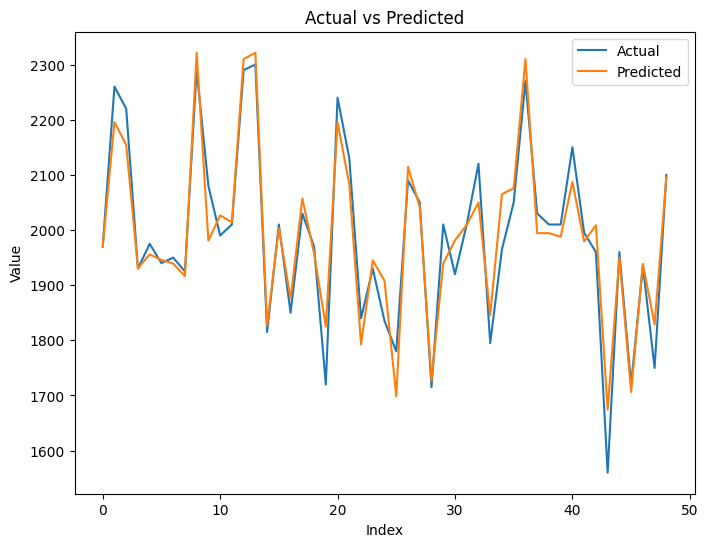

In [19]:
import matplotlib.pyplot as plt
import numpy as np
# Plotting actual and predicted values
# Plotting the predicted values and actual values
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual')
plt.plot(np.arange(len(y_test)), knn_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
# Print the results
print("KNN - MAPE:", knn_mape)
print("Decision Tree - MAPE:", tree_mape)
print("MLP - MAPE:", mlp_mape)
print("KNN - MSE:", knn_mse)
print("Decision Tree - MSE:", tree_mse)
print("MLP - MSE:", mlp_mse)